# Metin Görselleştirme

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("train.tsv", sep="\t")
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


## Metin Ön İşleme

In [4]:
# küçük dönüşümü
data["Phrase"] = data["Phrase"].apply(lambda x: " ".join(word.lower() for word in x.split()))
data["Phrase"].head(10)

0    a series of escapades demonstrating the adage ...
1    a series of escapades demonstrating the adage ...
2                                             a series
3                                                    a
4                                               series
5    of escapades demonstrating the adage that what...
6                                                   of
7    escapades demonstrating the adage that what is...
8                                            escapades
9    demonstrating the adage that what is good for ...
Name: Phrase, dtype: object

In [5]:
# noktalama işaretleri
data["Phrase"] = data["Phrase"].str.replace('[^\w\s]','')
data["Phrase"].head(10)

/var/folders/x8/nnk_zbps5d547d0lzb19x0s80000gn/T/ipykernel_23545/3752723565.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Phrase"] = data["Phrase"].str.replace('[^\w\s]','')


0    a series of escapades demonstrating the adage ...
1    a series of escapades demonstrating the adage ...
2                                             a series
3                                                    a
4                                               series
5    of escapades demonstrating the adage that what...
6                                                   of
7    escapades demonstrating the adage that what is...
8                                            escapades
9    demonstrating the adage that what is good for ...
Name: Phrase, dtype: object

In [6]:
# sayılar
data["Phrase"] = data["Phrase"].str.replace('\d','')
data["Phrase"].head(10)

/var/folders/x8/nnk_zbps5d547d0lzb19x0s80000gn/T/ipykernel_23545/427578861.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Phrase"] = data["Phrase"].str.replace('\d','')


0    a series of escapades demonstrating the adage ...
1    a series of escapades demonstrating the adage ...
2                                             a series
3                                                    a
4                                               series
5    of escapades demonstrating the adage that what...
6                                                   of
7    escapades demonstrating the adage that what is...
8                                            escapades
9    demonstrating the adage that what is good for ...
Name: Phrase, dtype: object

In [7]:
# stopwords
# sık kullanılan sözcükleri sildim
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords
sw = stopwords.words("english")

data["Phrase"] = data["Phrase"].apply(lambda x: " ".join(word for word in x.split() if word not in sw))
data["Phrase"].head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rumeysaay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    series escapades demonstrating adage good goos...
1      series escapades demonstrating adage good goose
2                                               series
3                                                     
4                                               series
5             escapades demonstrating adage good goose
6                                                     
7             escapades demonstrating adage good goose
8                                            escapades
9                       demonstrating adage good goose
Name: Phrase, dtype: object

In [8]:
# az kullanılan sözcüklerin silinmesi
sil = pd.Series(' '.join(data['Phrase']).split()).value_counts()[-1000:]
data["Phrase"] = data["Phrase"].apply(lambda x: " ".join(word for word in x.split() if word not in sil))
data["Phrase"].head(10)

0    series escapades demonstrating adage good goos...
1      series escapades demonstrating adage good goose
2                                               series
3                                                     
4                                               series
5             escapades demonstrating adage good goose
6                                                     
7             escapades demonstrating adage good goose
8                                            escapades
9                       demonstrating adage good goose
Name: Phrase, dtype: object

In [9]:
# lemmi ile köke indirgeyelim
from textblob import Word
nltk.download("wordnet")

data["Phrase"] = data["Phrase"].apply(lambda x: " ".join(Word(e).lemmatize() for e in x.split()))
data["Phrase"].head(10)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rumeysaay/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    series escapade demonstrating adage good goose...
1       series escapade demonstrating adage good goose
2                                               series
3                                                     
4                                               series
5              escapade demonstrating adage good goose
6                                                     
7              escapade demonstrating adage good goose
8                                             escapade
9                       demonstrating adage good goose
Name: Phrase, dtype: object

## Terim Frekansı

In [20]:
tf1 = pd.Series(' '.join(data['Phrase']).split()).value_counts().reset_index()

In [21]:
# kelimeler ve bu kelimelerin frekansları
tf1.columns = ["words","tf"]

In [22]:
# her bir kelime ve kelimenin frekansı
tf1.head(12)

,words,tf
0,film,7668
1,movie,7250
2,nt,3970
3,one,3783
4,like,3092
5,character,2850
6,story,2831
7,rrb,2438
8,make,2415
9,time,2293


In [24]:
tf1.nunique()

words    13836
tf         512
dtype: int64

13836 tane benzersiz sözcük var

In [23]:
tf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13836 entries, 0 to 13835
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   words   13836 non-null  object
 1   tf      13836 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 216.3+ KB


13836 tane gözlem var

tf1'deki bütün kelimeler benzersizmiş

## barplot: sütun grafik

In [29]:
# frekansı yüksek olan kelimeleri seçelim
a = tf1[tf1["tf"] > 2000]
a.head()

,words,tf
0,film,7668
1,movie,7250
2,nt,3970
3,one,3783
4,like,3092


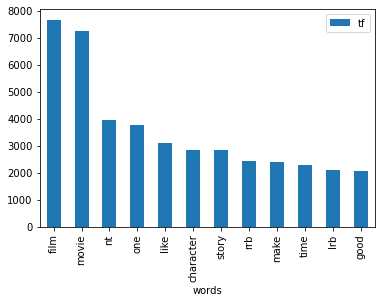

In [30]:
a.plot.bar(x="words", y="tf");

## Word Cloud

kelime bulutu, en sık kullanılan veri görselleştirme tekniklerinden birisidir.
kelimeleri geçme frekansına göre bir bulut şeklinde sunar.

In [31]:
!pip install wordcloud

In [35]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [36]:
# yorum
text = data["Phrase"][0]

### wordcloud ile yorumu görselleştirelim

In [37]:
wordcloud = WordCloud().generate(text)

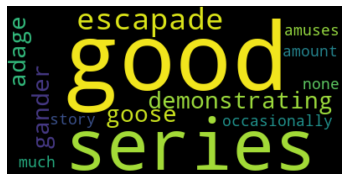

In [38]:
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [39]:
wordcloud = WordCloud(max_font_size = 50,
                     max_words=50, # max kullanılacak olan kelime
                     background_color = "white").generate(text)

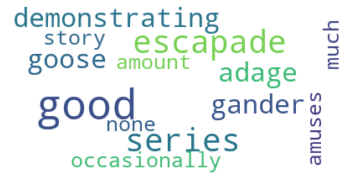

In [40]:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# bir yorum için yapmış olduğumuz işlemi bütün kelimeler için gerçekleştirmeye çalışalım
# bütün yorumları tek bir yorummuş gibi değerlendirmek

In [45]:
# bütün yorumları topladım
text = " ".join(i for i in data.Phrase)

In [52]:
# tüm metni görselleştirelim
wordcloud = WordCloud(max_font_size = 50,
                     max_words = 70,
                     background_color = "white").generate(text)

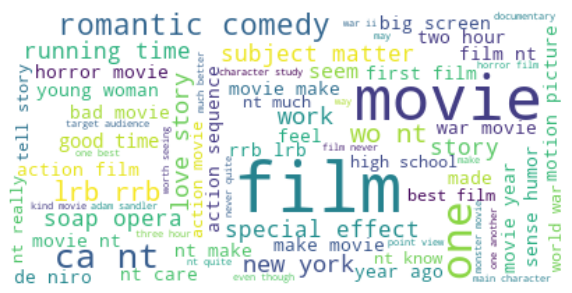

In [53]:
plt.figure(figsize = [10,10])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

## Şablonlara Göre Word Cloud

In [55]:
# Şablonun üzerine kelime bulutu oluşturacağım

In [56]:
# VBO.jpg kullanıp Word Cloud oluşturacağım
vbo_mask = np.array(Image.open("VBO.jpg"))

In [59]:
wc = WordCloud(background_color = "white",
                     max_words = 1000,
                     mask = vbo_mask, # şablon
                     contour_width = 3,
                     contour_color = "firebrick")

In [60]:
wc.generate(text);

In [61]:
wc.to_file("vbo.png");

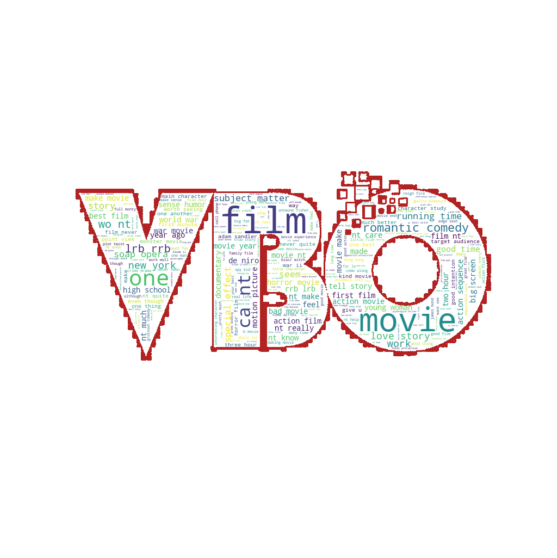

In [63]:
plt.figure(figsize = [10,10])
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [64]:
# Şablonun üzerine kelime bulutu oluşturacağım

In [66]:
# tr.jpg kullanıp Word Cloud oluşturacağım
tr_mask = np.array(Image.open("tr.png"))

In [67]:
wc = WordCloud(background_color = "white",
                     max_words = 1000,
                     mask = tr_mask, # şablon
                     contour_width = 3,
                     contour_color = "firebrick")

In [68]:
# Tüm metin
wc.generate(text);

In [69]:
wc.to_file("TR.png");

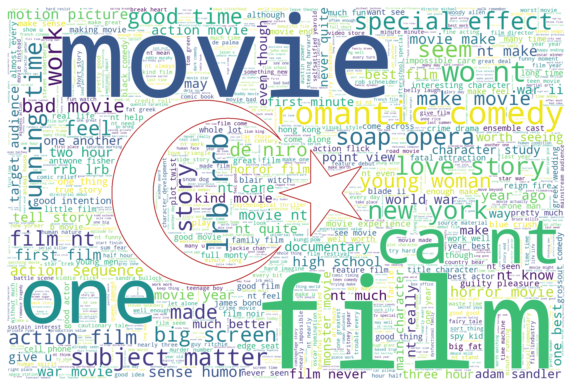

In [70]:
plt.figure(figsize = [10,10])
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [ ]:
# frekansı yüksek olan kelimeler büyük yazılır.